# One-way ANOVA example using an imported dataset

In this notebook I will demonstrate how to conduct a one-way ANOVA on an imported dataset. 

In [1]:
# Importing key software libraries.

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing a dataset looking at a lie detector study where people lie/ tell the truth/ or complete a control task.

hr_df = pd.read_csv("HR Polygraph.csv")

hr_df.head()

,id,Lie,Truth,Coloured_sqr,Framing
0,1,58.536483,84.858119,53.783338,1
1,2,74.968975,72.235336,75.913702,1
2,3,61.114431,91.722885,87.325517,1
3,4,60.214866,78.241833,77.854317,1
4,5,61.410426,72.986057,102.853567,1


In [3]:
# Creating a groups object with the three variables of interest:

groups = hr_df[['Lie', 'Truth', 'Coloured_sqr']]

groups

,Lie,Truth,Coloured_sqr
0,58.536483,84.858119,53.783338
1,74.968975,72.235336,75.913702
2,61.114431,91.722885,87.325517
3,60.214866,78.241833,77.854317
4,61.410426,72.986057,102.853567
...,...,...,...
75,45.824996,67.734263,51.065190
76,101.107714,70.883897,86.426843
77,85.011061,69.120016,111.991884
78,90.235426,57.992397,54.251209


In [4]:
groups.dtypes

Lie             float64
Truth           float64
Coloured_sqr    float64
dtype: object

### Running the one-way ANOVA

In [5]:
# Running the one-way ANOVA using the scipy.stats f_oneway method. 
aov_res = stats.f_oneway(groups['Lie'], groups['Truth'], groups['Coloured_sqr'])
aov_res

F_onewayResult(statistic=3.0913558261598926, pvalue=0.04727749177724799)

In [6]:
# Again, running the one-way ANOVA using the scipy.stats f_oneway method using the variables from the original dataframe. 
f_val, p_val = stats.f_oneway(hr_df['Lie'], hr_df['Truth'], hr_df['Coloured_sqr'])
print("F-Value: ", f_val, "P-Value: ", p_val)

F-Value:  3.0913558261598926 P-Value:  0.04727749177724799


Above, we can see that we get a significant ANOVA result. As a consequence we need to do post-hoc tests to find which levels of the independent (grouping) variable have signficantly different means from each other. To do this I will use Tukey HSD pairwise comparisons.

### Post-hoc comparisons using Tukey HSD

In [7]:
# To conduct a pairwise Tukey HSD test we need to import the multicomp pairwise_tukeyhsd method from the statsmodels library.

from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [8]:
# Currently the data is short and wide with the three categories saved as three separate variables. 
# I need to convert this to a long and thin dataframe in order to run the pairwise comparisons. 
# This can be done using the pandas melt() method
cat_cond = list(groups.columns)
groups_long = pd.melt(groups, value_vars = cat_cond, value_name = 'mean_arousal', ignore_index = True)

In [9]:
groups_long

,variable,mean_arousal
0,Lie,58.536483
1,Lie,74.968975
2,Lie,61.114431
3,Lie,60.214866
4,Lie,61.410426
...,...,...
235,Coloured_sqr,51.065190
236,Coloured_sqr,86.426843
237,Coloured_sqr,111.991884
238,Coloured_sqr,54.251209


In [10]:
groups_long.dtypes

variable         object
mean_arousal    float64
dtype: object

In [12]:
# Running the pairwise comparisons using Tukey HSD. (endog = dv data variable, groups = grouping var)

tukey_tests = pairwise_tukeyhsd(endog = groups_long['mean_arousal'], groups = groups_long['variable'], alpha = 0.05)


In [13]:
# Requesting the summary to get the output. 
tukey_tests.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Coloured_sqr,Lie,4.8164,0.1862,-1.6463,11.2791,False
Coloured_sqr,Truth,-1.7653,0.7958,-8.228,4.6974,False
Lie,Truth,-6.5817,0.0448,-13.0444,-0.119,True


We can see above that the pariwise comparisons show a significant difference only between the lie and truth conditions. 

In [14]:
groups_long['mean_arousal'].describe()

count    240.000000
mean      75.032186
std       17.481089
min       33.876586
25%       62.212014
50%       74.373901
75%       84.455430
max      142.863806
Name: mean_arousal, dtype: float64

Creating a forest plot for the groups and confidence intervals. 

group1,group2,meandiff,p-adj,lower,upper,reject
Coloured_sqr,Lie,4.8164,0.1862,-1.6463,11.2791,False
Coloured_sqr,Truth,-1.7653,0.7958,-8.228,4.6974,False
Lie,Truth,-6.5817,0.0448,-13.0444,-0.119,True


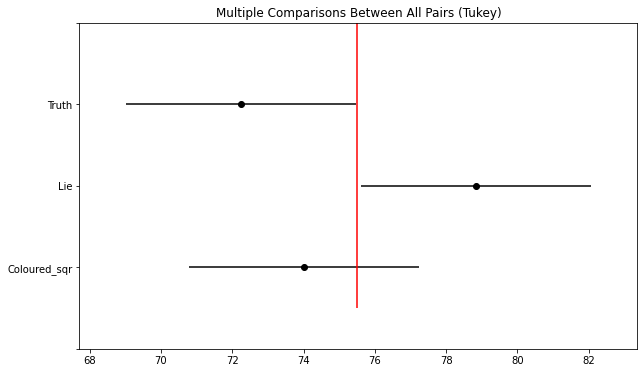

In [15]:
tukey_tests.plot_simultaneous()
plt.vlines(x=75.5, ymin=-0.5, ymax=4.5, color = 'red')

tukey_tests.summary()